In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Textual data: classification and exploration.

In [3]:
import pandas as pd

review = pd.read_csv('/content/drive/My Drive/dataset/imdb-reviews-pt-br.csv')
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
print("Negative \n")
print(review.text_pt[189])

print("\nPositive \n")
print(review.text_pt[49002])

Negative 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.

Positive 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos 

In [5]:
print(review.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [6]:
classification = review["sentiment"].replace(["neg", "pos"], [0,1])
review["classification"] = classification

In [7]:
review.head()

,id,text_en,text_pt,sentiment,classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


## Bag of Words: creating representations of human language.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(text)

In [9]:
vectorizer.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [10]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [11]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                    columns=vectorizer.get_feature_names_out())
sparse_matrix

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [12]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(review["text_pt"])
print(bag_of_words.shape)

(49459, 50)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def classify_text(text, text_column, classification_column):
  vectorizer = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vectorizer.fit_transform(text[text_column])

  X_train, X_test, y_train, y_test = train_test_split(bag_of_words,
                                                    text[classification_column],
                                                    random_state = 42)
  
  logistic_regression = LogisticRegression(solver="lbfgs")
  logistic_regression.fit(X_train, y_train)
  return logistic_regression.score(X_test, y_test)

In [14]:
print(classify_text(review, "text_pt", "classification"))

0.6583097452486858


## Data visualization with WordCloud.

In [15]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in review["text_pt"]])

word_cloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

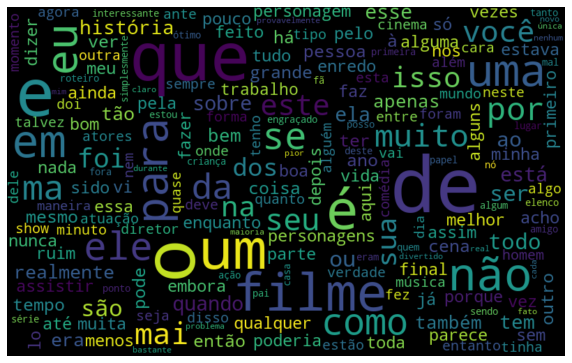

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
def neg_word_cloud(text, text_column):
    negative_text = text.query("sentiment == 'neg'")
    all_words = ' '.join([text for text in negative_text[text_column]])

    word_cloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [18]:
def pos_word_cloud(text, text_column):
    positive_text = text.query("sentiment == 'pos'")
    all_words = ' '.join([text for text in positive_text[text_column]])

    word_cloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

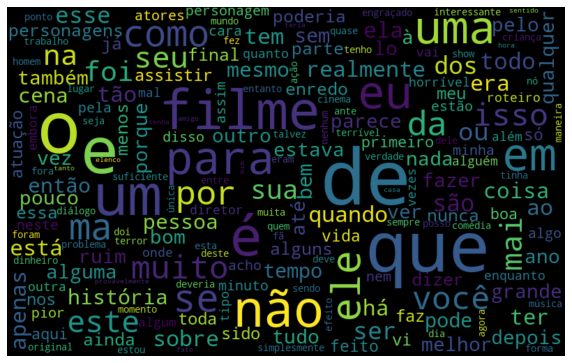

In [19]:
neg_word_cloud(review, "text_pt")

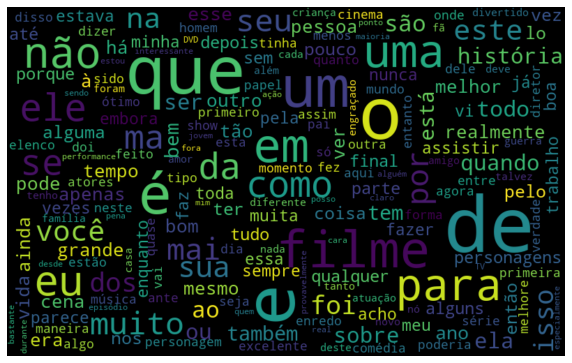

In [20]:
pos_word_cloud(review, "text_pt")

## Tokenization and NLTK library

In [21]:
import nltk

phrase = ["um filme bom", "um filme ruim"]
frequency = nltk.FreqDist(phrase)
frequency

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [22]:
from nltk import tokenize

phrase = "Bem vindo ao mundo do PLN!"

space_token = tokenize.WhitespaceTokenizer()
phrase_token = space_token.tokenize(phrase)
print(phrase_token)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [23]:
phrase_token = space_token.tokenize(all_words)
frequency = nltk.FreqDist(phrase_token)

In [24]:
df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
df_frequency.nlargest(columns = "Frequency", n = 10)

,Word,Frequency
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915
